In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
# 提供了各种用于模型研究的现实数据
import sklearn.datasets as datasets

In [2]:
# 获取鸢尾花数据
iris = datasets.load_iris()
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [3]:
# 样本集的所有数据
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [5]:
data.shape,feature_names

((150, 4),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [8]:
# 方差大的数据特征信息更多，所以选择两个方差大的特征进行二维空间的展示
data.std(axis=0)

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

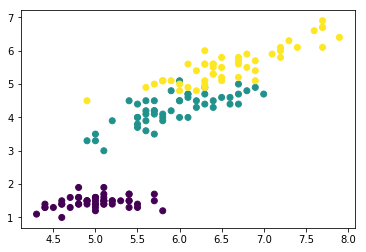

In [15]:
# 选择第一列和第三列展示 
plt.scatter(data[:,0],data[:,2],c=target)

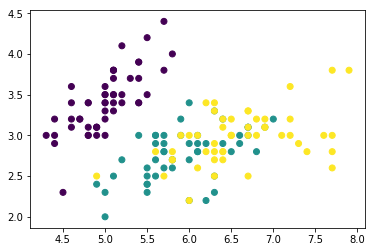

In [16]:
# 选择第一列和第二列
plt.scatter(data[:,0],data[:,1],c=target)

In [18]:
# 用于拆分样本集（训练集和测试集）的工具
from sklearn.model_selection import train_test_split
# 用2个特征训练模型的结果
train1 = data[:,[0,2]]
X_train1,X_test1,y_train1,y_test1 = train_test_split(train1,target,test_size=0.2,random_state=1)

# 用4个特征训练模型的结果
train2 = data
X_train2,X_test2,y_train2,y_test2 = train_test_split(train2,target,test_size=0.2,random_state=1)

In [20]:
X_train1.shape,X_test1.shape

((120, 2), (30, 2))

In [21]:
X_train2.shape,X_test2.shape

((120, 4), (30, 4))

In [22]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train1,y_train1)

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2,y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
# 2个特征训练的模型
y1_ = knn1.predict(X_test1)

In [28]:
# 4个特征训练的模型
y2_ = knn2.predict(X_test2)

In [33]:
(y_test1 == y1_).sum()/y_test1.size

0.9333333333333333

In [35]:
(y_test2 == y2_).sum()/y_test2.size

1.0

In [ ]:
# 4个特征的准确率要高于2个特征的准确率
# 特征选择的目的
# 1. 降低算法的复杂度
# 2. 剔除无效特征，减少无效特征对模型训练的负影响
# 3. 使数据可视化（当前案例的目的）

### 绘制分类边界

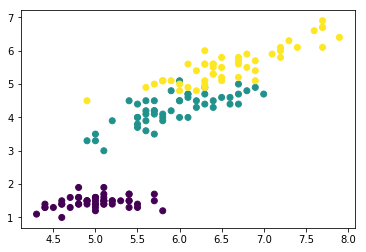

In [36]:
# 思路：获取样本集周边所有的假想数据，对这些假想数据进行预测，得出预测结果，
# 绘制所有的假想数据到屏幕上
plt.scatter(data[:,0],data[:,2],c=target)

In [47]:
train1.shape

(150, 2)

In [49]:
xmin,xmax = train1[:,0].min()-0.5,train1[:,0].max()+0.5
ymin,ymax = train1[:,1].min()-0.5,train1[:,1].max()+0.5

x = np.linspace(xmin,xmax,300)
y = np.linspace(ymin,ymax,300)

xx,yy = np.meshgrid(x,y)

X_test = np.concatenate((xx.reshape(-1,1),yy.reshape(-1,1)),axis=1)

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)
# 用所有样本数据进行训练
knn.fit(train1,target)
# 预测所有的假想数据的分类情况
y_ = knn.predict(X_test)
y_.shape,Series(y_).unique()

((90000,), array([0, 1, 2], dtype=int64))

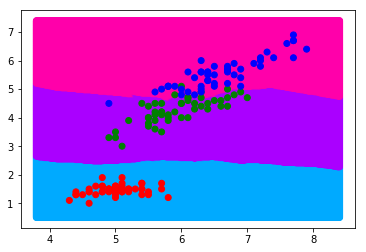

In [61]:
from matplotlib.colors import ListedColormap
colormap = ListedColormap(['red','green','blue'])
colormap2 = ListedColormap(['#00aaff','#aa00ff','#ff00aa'])

plt.scatter(X_test[:,0],X_test[:,1],c=y_,cmap=colormap2)
plt.scatter(data[:,0],data[:,2],c=target,cmap=colormap)

In [40]:
n1 = np.array([1,2,3])
n2 = np.array([4,5,6])
m,k = np.meshgrid(n1,n2)

In [44]:
np.concatenate((m.reshape(-1,1),k.reshape(-1,1)),axis=1)

array([[1, 4],
       [2, 4],
       [3, 4],
       [1, 5],
       [2, 5],
       [3, 5],
       [1, 6],
       [2, 6],
       [3, 6]])